<a href="https://colab.research.google.com/github/blurrydev/Python-Notebooks-IITM/blob/main/%5BMLT%5D_%5BWEEK_8%5D_%5BSVM%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machines

- SVM is a supervised machine learing algorith that can be used for both classification and regression.
- We will focus on classification aspect.
- SVM is a discriminative classifier like perceptron & logistic regression.
- Works in both binary and multiclass classification set ups.

@ Formula

- Width of margin = 2÷||w||
- Distance of the iᵗʰ point from the decision boundary is =  yᵢ ( (wᵀXᵢ + b) ÷ ||w|| ) 
- Absolute distance is = | ( (wᵀXᵢ + b) ÷ ||w|| ) |
- For margin of the boundary, yᵢ(wᵀXᵢ + b) = 1, So the formula for the margin of boundary is, 1 ÷ ||w||
- From the above equations, we can conclude that in order to maximize the margin we need to apply constraint optimization.

Objective: max (1 ÷ ||w||)

Constraint: yᵢ(wᵀXᵢ + b) >= 1 *(since the point has to be outside margin)*

Objective can also be maniulated as min ( (||w|| ** 2) ÷ 2) for mathemetical convenience.

##1. Training data

- In binary classification set up, training data consists of 
  - Feature matrix **X** with shape *(n,m)*. Each eample is represented by with m features and there are total n examples.
  - Label vector **y** containing labels of *n* examples.

- In multiclass & multilabel set ups 
  - Training data consists of feature matrix with same specification as the binar set up,
  - Label matrix **Y** containing one of k labels for each of *n* examples & it's shape is *(n,k)*.

## 2. Model
(in terms of binary classification)


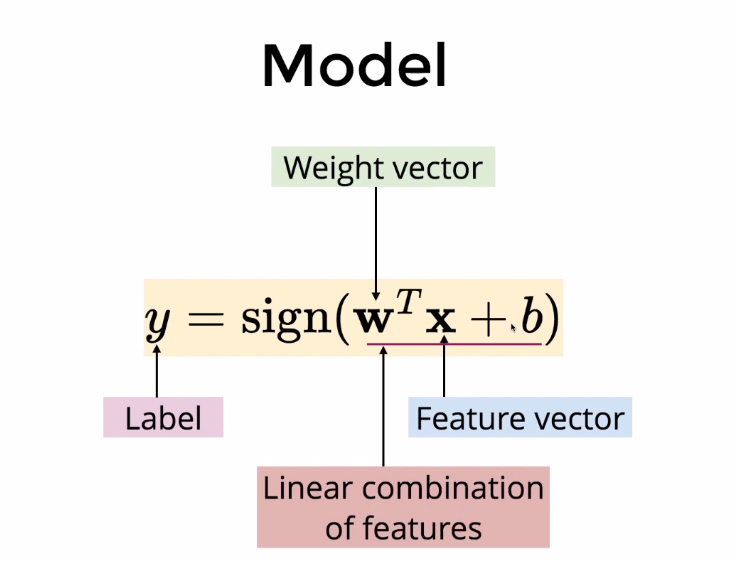

- This is a linear classifier which were familiar with.
- Labels are assumed to be -1 & +1

### Learning problem

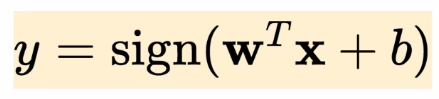

THe SVM learns a hyperplane separating two classes with parameters *w* & *b*.



***Given the training data, find the best values for w and b that results into minimum loss.***

SVM finds the hyperplane in slightly different manner than other classifiers.

- It selects the hyperplane that maximizes the distance to the closest data points from both classes.
- In other words, it is the hyperplane with maximum margin between two classes.

## 3. Loss Function

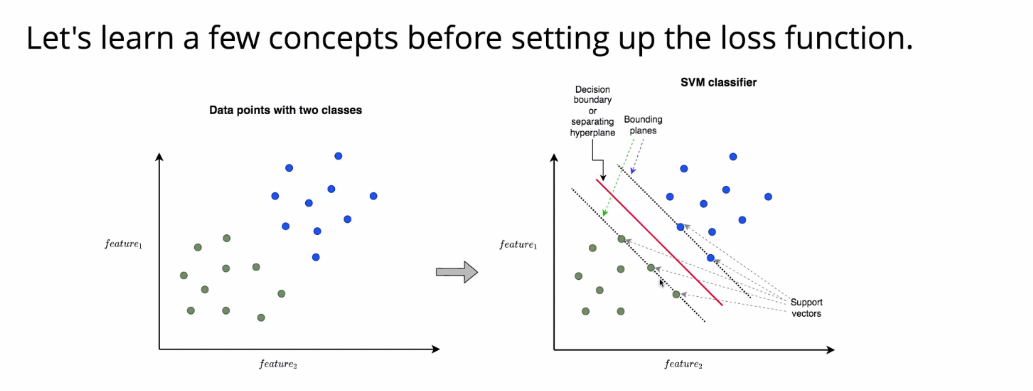

There are three components here:
- Separating hyperplane
- Bounding planes
- Support vectors

**Separating Hyperplanes** is the classifier. It is at equal distance from both the classes and separate them such that there is maximum margin between two classes.

**Boundng Planes** are parallel to separating hyperplanes on the either sides and pass through support vectors.

**Support vectors** are subset of training points closer to the seaparating hyperplane and influence its position and orientation.

#### Bounding planes

The bounding plane on the side of the positive class has the following equation:

> Wᵀ X + b = 1

The bounding plane on the side of the negative class has the following equation:

> Wᵀ X + b = -1

We can write this in one equation as follows using the label of an example.

> 𝒴(Wᵀ X + b) = 1


Any point on or above the bounding plane belongs to the positive class:

> Wᵀ X + b >= 1

Any point on or below the bounding plane belongs to the negative class:

> Wᵀ X + b <= -1

Compactly the correctly classified points satisfy the following equation:

> 𝒴(Wᵀ X + b) >= 1

This constraint ensures that none of the point falls within the margin.

# Demonstration: Soft Margin SVM

Importing important libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification, make_blobs

# set default color map for rntire notebook/session
sns.set_theme(style='whitegrid')

## Model

- So far we trained a bunch of classifier for learning a separating hyperplane between classes. SVM also finds the separating hyperplanes between the clases, but with constraint the margin between two classes is maximized.

- The hard margin SVM assumes that the classes are linearly separable and none of the data points within the margin is misclassified.

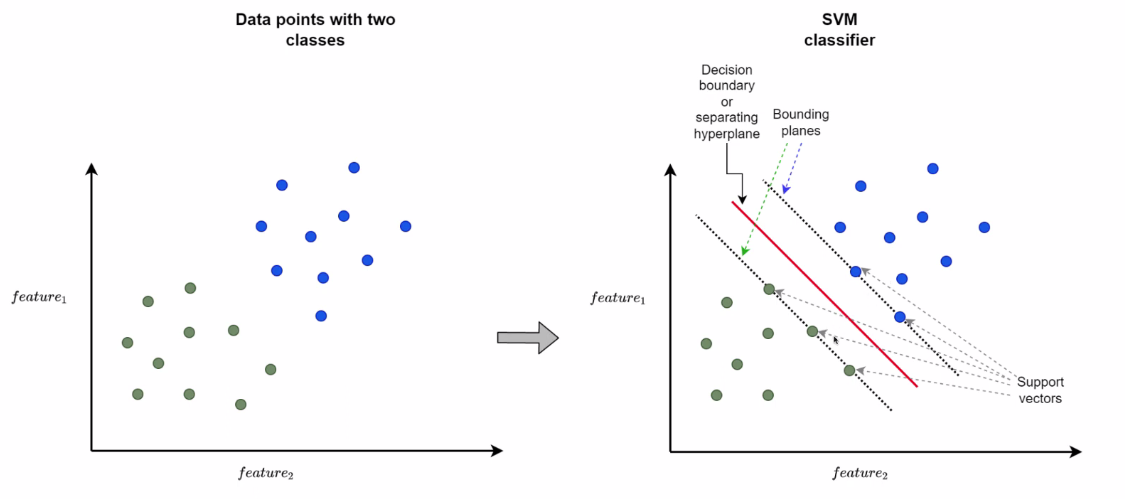

In [ ]:
y = np.sign(np.dot(w,x) + b)

## Loss Function

- We use hinge loss as a function: `max(0, 1-t)`
  - It is equal to 0 when t >= 1.
  - It's derivative (slope) is equal to -1 if t < 1 & 0 if t > 1.
  - It is not differential at t = 1.

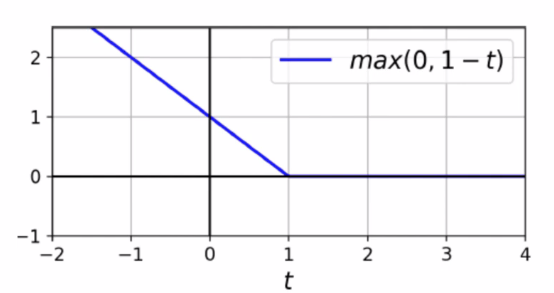

### Hinge Loss function for SVM

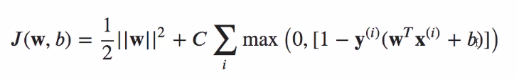

The **second term** for the function, **hinge loss**, is to penalize misclassification.

  - It measures the error due to misclassification (or data points being closer to the classification boundary than the margin).

*Hinge* describes the fact that the error is 0 if the data point is classified correctly (and is not too close to the decision boundary).

We need to minimize the hinge loss function to find the max-margin classifier.

### Optimization Procedure

We will be using gradient descent procedure for optimization.

## Soft SVM implementation

In [ ]:
class softSVM:
  def __init__(self, C):
    self._support_vectors = None
    self.C = C
    self.w = None
    self.b = None
    self.X = None
    self.y = None

    # n is the number of data points
    self.n = 0

    # d is the number of dimentions
    self.d = 0

  def __decision_function(self, X):
    return X.dot(self.w) + self.b
  
  def __cost(self, margin):
    return (1/2) * self.w.dot(self.w) + self.C * np.sum(np.maximum(0, 1- margin))

  def __margin(self, X, y):
    return y * self.__decision_function(X)

  def fit(self, X, y, lr = 1e_3, epochs = 500):
    # initialize w & b
    self.n, self.d = X.shape
    self.w = np.random.randn(self.d)
    self.b = 0

    # required only for plotting
    self.X = X
    self.y = y

    loss_array = []
    for _ in range(epochs):
      margin = self.__margin(X,y)
      loss = self.__cost(margin)
      loss_array.append(loss)

      missclassified_pts_idx = np.where(margin < 1)[0]
      d_w = self.w - self.C * y[missclasified_pts_idx].dot(X[missclassified_pts_idx])
      self.w = self.w - lr * d_w

      d_b = self.C * np.sum(y[missclassified_pts_idx])
      self.b = self.b - lr * d_b
    
    self._support_vectors = np.where(self.__margin[X,y] <= 1)[0]

  def predict(self, X):
    return np.sign(self.__decision_function(X))

  def score(self, X, y):
    p = self.predict(X)
    return np.mean(y == p)

  def plot_decision_boundary(self):
    plt.scatter(self.X[:, 0], self,X[:, 1], c = self.y, marker = '0', s = 100, cmap = 'autumn')

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    z = self.__decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY,Z, colors = ['g', 'k', 'g'], levels = [-1,0,1], 
               linestyles = ['--', '-', '--'], linewidths = [2.0, 2.0, 2.0])
    
    # highlight the support vectors
    ax.scatter(self.X[:, 0][self._support_vectors],
               self.X[;, 1][self._support_vectors], s = 250,
               linewidth = 1m facecolors = 'none', edgecolors = 'k')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()

## Training data

Let's first generate synthetic training data with two classes.

### Demo 1: Linearly separable data

In [ ]:
# generate artificial data points
X, Y = make_blobs(n_samples = 60,
                  n_features = 2,
                  centers = [[0,0], [6,6]],
                  cluster_std = 1,
                  random_state = 12)

Y = np.where(Y == 0, -1, 1)

# plot the two classes
plt.figure(figsize = (8,8))

plt.scatter(X[:, 0], X[:, 1], marker = 'o', c = Y, s = 200, edgecolor = 'k', cmap = 'autumn')
plt.xlabel('x1', fontsize = 20)
plt.ylabel('x2', fontsize = 20)
plt.title('Data points', fontsize = 20)
plt.show()

In [ ]:
svm = softSVM(c =1)
svm.fit(X, Y)

print(svm.w)

def get_hyperplane_value(x, w, b, offset):
  return -1*(w[0] * x + b + offset)/w[1]

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
plt.scatter(X[:, 0], X[:, 1], marker = 'o', c = Y, s = 200, edgecolor = 'k', cmap = 'autumn')
x0_1 = np.amin(X[:, 0])
x0_2 = np.amin(X[:, 0])

x1_1 = get_hyperplane_value(x0_1, svm.w, svm.b, 0)
x1_2 = get_hyperplane_value(x0_2, svm.w, svm.b, 0)

x1_1_m = get_hyperplane_value(x0_1, svm.w, svm.b, -1)
x1_2_m = get_hyperplane_value(x0_2, svm.w, svm.b, -1)

x1_1_p = get_hyperplane_value(x0_1, svm.w, svm.b, 1)
x1_2_p = get_hyperplane_value(x0_2, svm.w, svm.b, 1)

ax.plot((x0_1, x0_2), (x1_1, x1-2), 'y')
ax.plot((x0_1, x0_2), (x1_1_m, x1_2_m), 'k--')
ax.set_ylim([x1_min - 3, x1_max + 3])
ax.legend(['Hyperplane', 'Bounding plane 1', 'Bounding plane 2'], loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

### Prediction of new example

In [ ]:
newExample = np.array([-2.2, 2.2])

plt.figure(X[:, 0], X[:, 1], marker = 'o', c=Y, s=200, edgecolor = 'k', cmap = 'autumn')

plt.scatter(newExample[0], newExample[1], marker = 'o', c='blue',
            s = 250, edgecolor = 'k',alpha = 0.8)

plt.annotate('New example', xy = newExample,
             xytext = (50, 100), textcoords = 'offset points',
             arrowprops = dict(facecolor = 'black', shrink = 0.05), fontsize=24)

plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [ ]:
svm.predict(newExample)

### Demo 2: Linearly separable with noise

In [ ]:
# necessary imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_blobs


# set default color map for the entire session/notebook
sns.set_theme(style='whitegrid')

X,y = make_blobs(n_samples = 100, centers = 2, 
                 random_state = 0, cluster_std = 1.1)
plt.figure(figsize = (10,8))
plt.scatter(X[:,0], X[:, 1], marker = 'o', c=y, s=200, edgecolor = 'k', cmap= 'autumn')
plt.xlabel('x1', fontsize=20)
plt.ylabel('x2', fontsize=20)
plt.title('Data points, fontsize = 20')
plt.show()

In [ ]:
y[y == 0] = -1
svm = softSVM(c=10)
svm.fit(X,y)

fig = plt.figure(figsize = (8,8))
svm.plot_decision_boundary()

# Kernal SVM

- We will be implementing dual problem of soft SVM by replacing the dot product between two feature vectors with vernal function.

The similarity of two points is calculated with a specific kernal function.

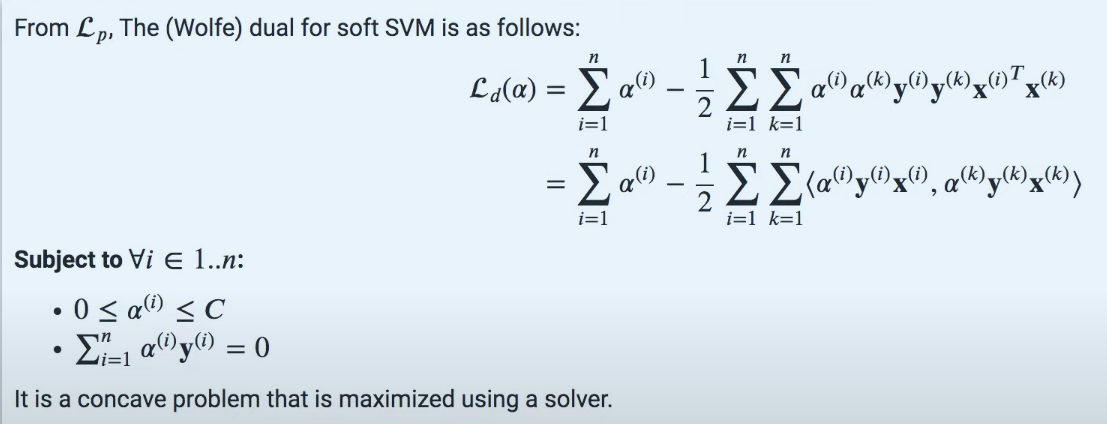

In [ ]:
class SVMDualProblem:
  def __init__(self, C=1.0, kernel = 'rbf', sigma = 0.1, degree=2):
    self.C = C
    if kernel == 'poly':
      self.kernel= self._polynomial_kernel
      self.c = 1
      self.degree = degree
    else:
      self.kernel = self._rbf_kernel
      self.sigma = sigma
    
    self.X = None
    self.y = None
    self.alpha = None
    self.b = 0
    self.ones = None

  def _rbf_kernel(self, X1, X2):
    return np.exp(-(1/self.sigma **2) * np.linealg.norm(
        X1[: np.newaxis] - X2[np.newaxis, :], axis = 2) ** 2)
    
  def _polynomial_kernel(self, X1, X2):
    return (self.c + X1.dot(X2.T)) ** self.degree

  def fit(self, X, y, lr = 1e-3, epochs = 100):

    self.X = X
    self.y = y

    self.alpha = np.random.random(X.shape[0])
    self.b = 0
    self.ones = np.ones(X.shape[0])

    y_iy_jk_ij = np.outer(y,y) * self.kernel(X,X)

    losses = []

    for _ in range(epochs):
      gradient = self.ones - y_iy_jk_ij.dot(self.alpha)

      self.alpha = self.alpha + lr * gradient

      self.alpha[self.alpha > self.C] = self.C
      self.alpha[self.alpha < 0] = 0

      loss = np.sum(self.alpha) - 0.5 * np.sum(
          np.outer(self.alpha, self.alpha) * y_iy_jk_ij)
      losses.append(loss)

      index = np.where((self.alpha) > 0 & (self.alpha < self.C))[0]
      # (m,) = (m,)(n,).(n,m) = (m,)
      b_i = y[index] - (self.alpha * y).dot(self.kernel[X, X[index]))
      # alternative code
      # b_i = y[index] = np.sum(self.alpha * y).reshape(-1,1) * self.kernel(X,X[index]), axis = 0)
      self.b = np.mean(b_i)

      plt.plot(losses)
      plt.title('loss per epochs')
      plt.show()

    def _decision_function(self, X):
      return (self.alpha * self.y).dot(self.kernel(self.X, X)) + self.b

    def predict(self, X):
      return np.sign(self._decision_function(X))

    def score(self, X, y):
      y_hat = self.predict(X)
      return np.mean(y == y_hat)

    def plot_decision_boundary(self):
      plt.scatter(self.X[:, 0], self.X[:, 1], c = self.y, s = 50, cmap = plt.cm.Paired, alpha = 0.5)
      ax = plt.gca()
      xlim = ax.get_xlim()
      ylim = ax.get_ylim()

      # create grid to evaluate model
      xx = np.linspace(xlim[0], xlim[1], 30)
      yy = np.linspace(ylim[0], ylim[1], 30)
      YY, XX = np.meshgrid(yy, xx)
      xy = np.vstack([XX.ravel(), YY.ravel()]).T
      z = self._decision_function(xy).reshape(XX.shape)

      # plot decision boundary and margin
      ax.contour(XX, YY, z, colors - ['b', 'q', 'r'], levels = [-1, 0, 1], alpha = 0.5,
                 linestyles = ['--', '-', '--'], linewidths = [2.0, 2.0, 2.0])
      
      # highlight the support vectors
      ax.scatter(self.X[:,0][self.alpha > 0], self.X[:,1][self.alpha > 0], s=50,
                 linewidth = 1, facecolors = 'none', edgecolors = 'k')
      
      plt.show()




In [ ]:
svm = SVMDualProblem(C=1, kernel = 'poly', degree =2)
svm.fit(X, y, lr = 1e-3)
print('train score:', svm.score(X,y))
svm.plot_decision_boundary()